In [ ]:
import os
import sys 

sys.path.append(os.path.abspath("/content/drive/MyDrive/70sEnt"))

In [ ]:
cd "/content/drive/MyDrive/70sEnt"

/content/drive/MyDrive/70sEnt


# oo시 데이터의 전반적인 EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats
from scipy.stats import pearsonr

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# matplot lib에서 사용 가능한 한글 폰트
import matplotlib as mpl
plt.rc('font', family='NanumBarunGothic')
#set([i.name for i in mpl.font_manager.fontManager.ttflist])

# 데이터 불러오기

In [ ]:
from Preprocessing import data_preprocessing

In [ ]:
socar_file_path='/content/drive/MyDrive/00_Aiffelton/데이터/'
weather_file_path='/content/drive/MyDrive/00_Aiffelton/데이터/기상데이터/'
finedust_file_apth='/content/drive/MyDrive/00_Aiffelton/데이터/미세먼지/'
standard_time='time2'

In [ ]:
ts_df = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time, location=None)

# OOO별 XXXX로 데이터셋 가공하여 target 설정
- 수요예측 단위 : OO
- 수요예측 타겟 : XXXX

# 전반적인 시간 파악

### 1. 시간, 요일, 월 단위 수요 파악

In [ ]:
ts_df['month'] = pd.to_datetime(ts_df['datetime']).dt.month
ts_df['day'] = pd.to_datetime(ts_df['datetime']).dt.day
ts_df['weekday'] = pd.to_datetime(ts_df['datetime']).dt.weekday
ts_df['hour'] = pd.to_datetime(ts_df['datetime']).dt.hour

(-0.5, 10.5, 0.0, 73.43405745967742)

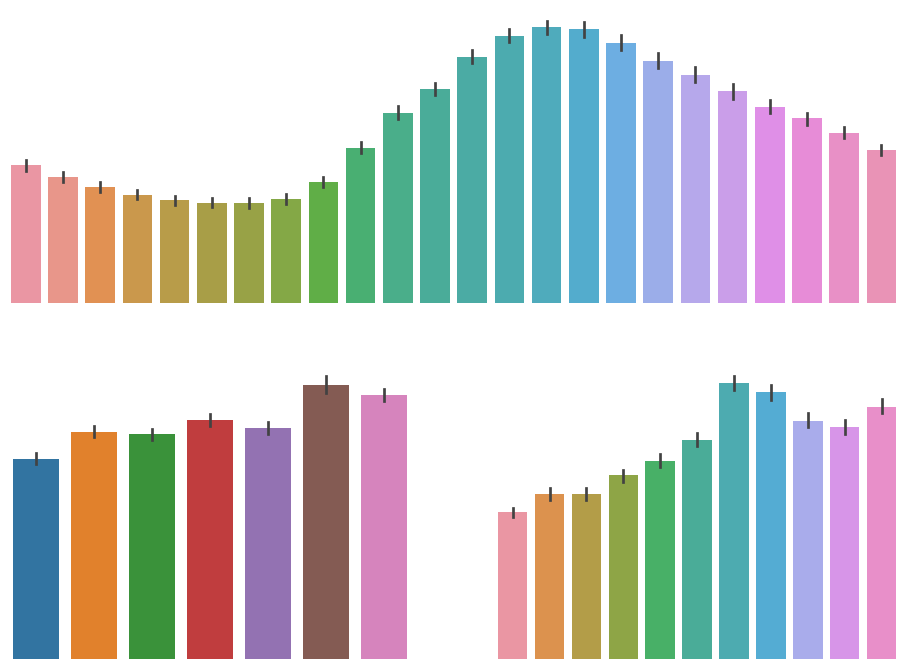

In [ ]:
plt.figure(figsize=(16,12))

plt.subplot(2, 1, 1)
sns.barplot(data=ts_df, x='hour', y='count')
plt.axis('off')

plt.subplot(2, 2, 3)
sns.barplot(data=ts_df, x='weekday', y='count')
plt.xticks(range(7), ['a','b', 'c', 'd', 'e', 'f', 'g'])
plt.axis('off')

plt.subplot(2, 2, 4)
sns.barplot(data=ts_df, x='month', y='count')
plt.axis('off')

<시간 기준>
- 시간에 따라 수요가 매우 다름

<요일 기준>
- 요일별로 수요가 매우 다름

<월 기준>
- 성수기와 비수기가 나눠짐

# 요일별 수요파악

### 1. 요일별 예약 시작 시간

In [ ]:
weekday_name = ['a', 'b', 'c', 'd', 'e', 'f', 'g']

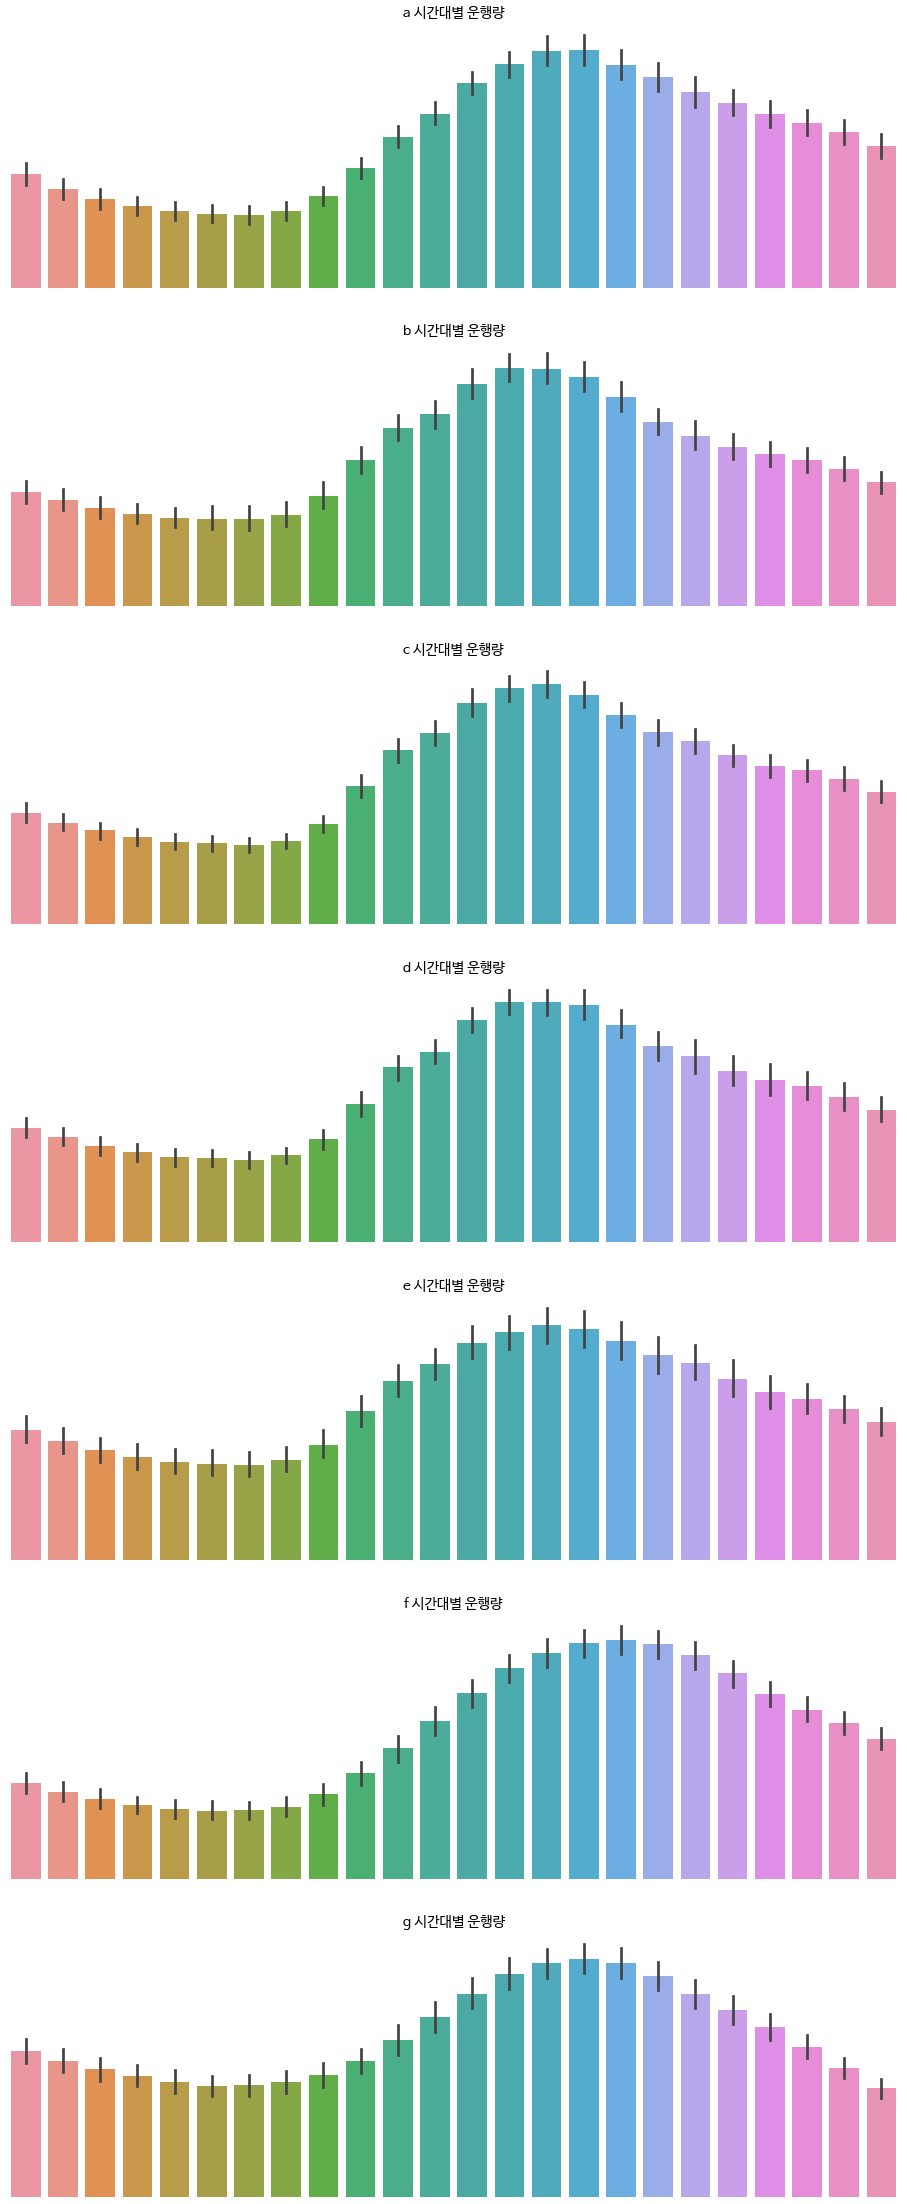

In [ ]:
plt.figure(figsize=(16, 40))

for idx, name in enumerate(weekday_name):
    plt.subplot(7, 1, idx+1)
    plt.title(name + ' 시간대별 운행량', fontsize=14)
    sns.barplot(data=ts_df[ts_df['weekday'] == idx], x='hour', y='count')
    plt.axis('off')

(-1.1500000000000001, 24.15, 14.733404255319147, 109.99106382978724)

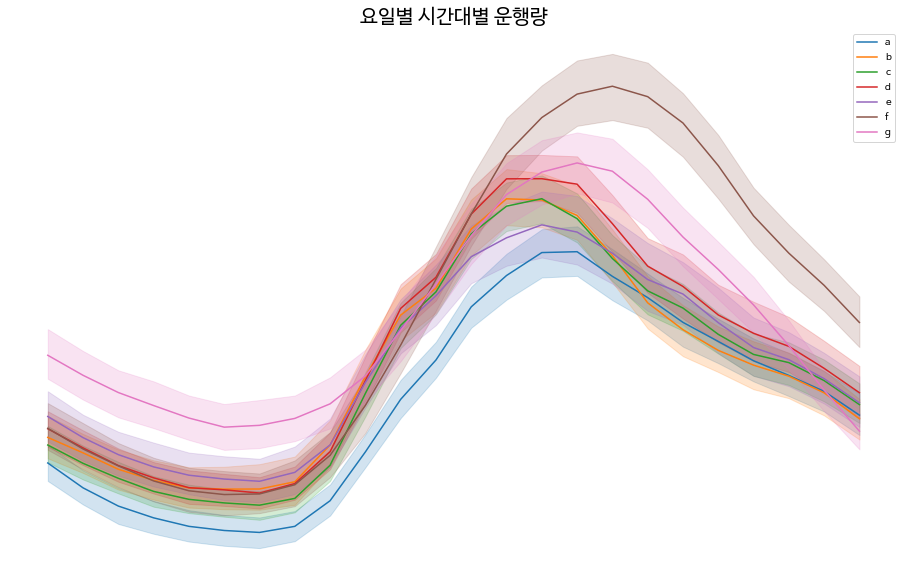

In [ ]:
plt.figure(figsize=(16, 10))

for idx, name in enumerate(weekday_name):
    plt.title('요일별 시간대별 운행량', fontsize=20)
    sns.lineplot(data=ts_df[ts_df['weekday'] == idx], x='hour', y='count')
plt.legend(weekday_name)
plt.axis('off')

# 구군별 수요

In [ ]:
regionA_df = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time, location='regionA')
regionB_df = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time, location='regionB')
regionC_df = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time, location='regionC')
regionD_df = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time, location='regionD')
regionE_df = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time, location='regionE')

In [ ]:
region_demand_sum = [regionA_df['count'].sum(), regionB_df['count'].sum(), regionC_df['count'].sum(), regionD_df['count'].sum(), regionE_df['count'].sum()]

In [ ]:
region_name = ['regionA', 'regionB', 'regionC', 'regionD', 'regionE']

In [ ]:
region_demand_sum_df = pd.DataFrame(region_demand_sum, index=region_name, columns=['demand'])
region_demand_sum_df

,demand
regionA,182485
regionB,38934
regionC,32598
regionD,27832
regionE,139792


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


(-0.5, 4.5, 0.0, 191609.25)

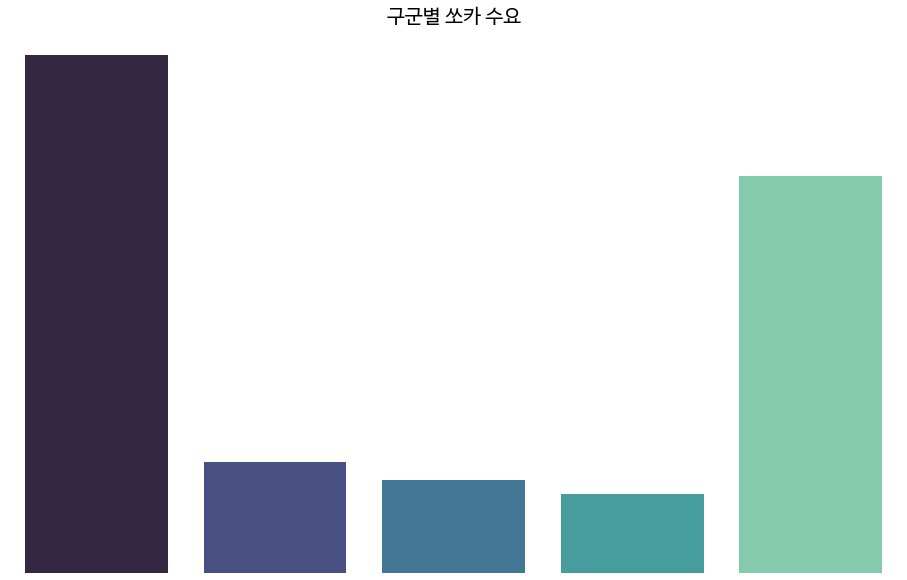

In [ ]:
plt.figure(figsize=(16,10))
plt.title('구군별 쏘카 수요', fontsize=20)
ax = plt.subplot(1, 1, 1)

sns.barplot(data=region_demand_sum_df, x=region_demand_sum_df.index, y='demand', palette='mako')
ax.set_xticklabels(region_name, fontsize=12)

plt.axis('off')

In [ ]:
print('<cityA OOOO년 구군별 쏘카 수요>')
print('regionA 쏘카 수요 :   {:3,d} 대,   regionA 사용 비율 : {:.2f} %'.format(regionA_df['count'].sum(), regionA_df['count'].sum()/ts_df['count'].sum() * 100))
print('regionB 쏘카 수요 :    {:3,d} 대,   regionB 사용 비율 :  {:.2f} %'.format(regionB_df['count'].sum(), regionB_df['count'].sum()/ts_df['count'].sum() * 100))
print('regionC 쏘카 수요 :    {:3,d} 대,   regionC 사용 비율 :  {:.2f} %'.format(regionC_df['count'].sum(), regionC_df['count'].sum()/ts_df['count'].sum() * 100))
print('regionD 쏘카 수요 :    {:3,d} 대,   regionD 사용 비율 :  {:.2f} %'.format(regionD_df['count'].sum(), regionD_df['count'].sum()/ts_df['count'].sum() * 100))
print('regionE 쏘카 수요 :   {:3,d} 대,   regionE 사용 비율 : {:.2f} %'.format(regionE_df['count'].sum(), regionE_df['count'].sum()/ts_df['count'].sum() * 100))

<cityA OOOO년 구군별 쏘카 수요>
regionA 쏘카 수요 :   182,485 대,   regionA 사용 비율 : 43.28 %
regionB 쏘카 수요 :    38,934 대,   regionB 사용 비율 :  9.23 %
regionC 쏘카 수요 :    32,598 대,   regionC 사용 비율 :  7.73 %
regionD 쏘카 수요 :    27,832 대,   regionD 사용 비율 :  6.60 %
regionE 쏘카 수요 :   139,792 대,   regionE 사용 비율 : 33.15 %


In [ ]:
region_df = [regionA_df, regionB_df, regionC_df, regionD_df, regionE_df]

In [ ]:
for region in region_df:
  region['month'] = pd.to_datetime(region['datetime']).dt.month
  region['day'] = pd.to_datetime(region['datetime']).dt.day
  region['weekday'] = pd.to_datetime(region['datetime']).dt.weekday
  region['hour'] = pd.to_datetime(region['datetime']).dt.hour

(-0.30000000000000004, 6.3, 1.5968905141843972, 30.30040558510638)

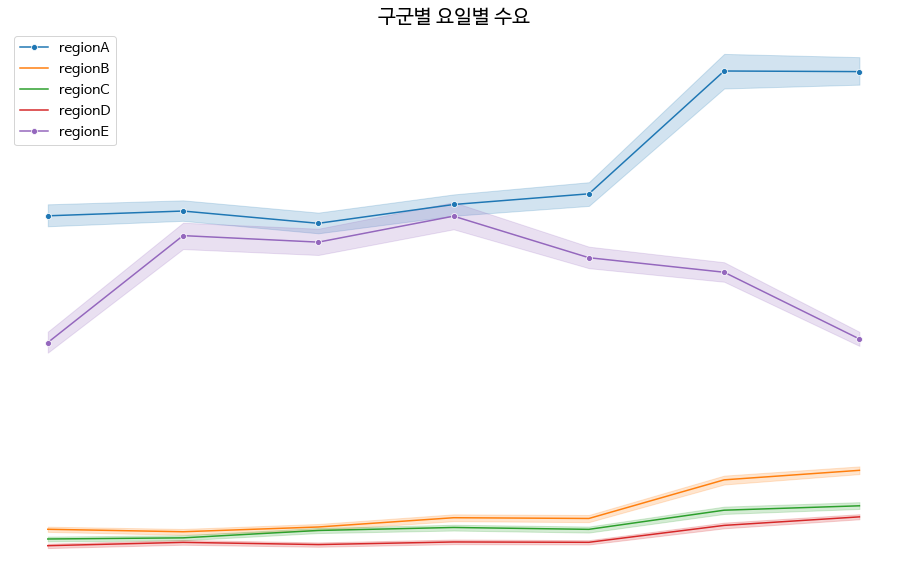

In [ ]:
fig = plt.figure(figsize=(16,10))

plt.title('구군별 요일별 수요', fontsize=20)
sns.lineplot(data=regionA_df, x='weekday', y='count', marker='o')
sns.lineplot(data=regionB_df, x='weekday', y='count')
sns.lineplot(data=regionC_df, x='weekday', y='count')
sns.lineplot(data=regionD_df, x='weekday', y='count')
sns.lineplot(data=regionE_df, x='weekday', y='count', marker='o')

plt.xticks(range(7), ['A', 'B', 'C', 'D', 'E', 'F', 'G'], fontsize=12)
plt.legend(['regionA', 'regionB', 'regionC', 'regionD', 'regionE'], fontsize=14)

plt.axis('off')

In [ ]:
print('cityA 데이터 중, regionA 데이터 비율 : {:.2f} %'.format(regionA_df['count'].sum() / ts_df['count'].sum() * 100))
print('cityA 데이터 중, regionE 데이터 비율 : {:.2f} %'.format(regionE_df['count'].sum() / ts_df['count'].sum() * 100))
print('cityA 데이터 중, regionB 데이터 비율 : {:.2f} %'.format(regionB_df['count'].sum() / ts_df['count'].sum() * 100))
print('cityA 데이터 중, regionC 데이터 비율 : {:.2f} %'.format(regionC_df['count'].sum() / ts_df['count'].sum() * 100))
print('cityA 데이터 중, regionD 데이터 비율 : {:.2f} %'.format(regionD_df['count'].sum() / ts_df['count'].sum() * 100))

cityA 데이터 중, regionA 데이터 비율 : 43.28 %
cityA 데이터 중, regionE 데이터 비율 : 33.15 %
cityA 데이터 중, regionB 데이터 비율 : 9.23 %
cityA 데이터 중, regionC 데이터 비율 : 7.73 %
cityA 데이터 중, regionD 데이터 비율 : 6.60 %


- cityA에서 regionA의 쏘카 데이터는 43.28%를 차지함
- cityA에서 regionE의 쏘카 데이터는 33.15%를 차지함
- 세부지역별 특성과 지역간 연관성을 자세히 볼 필요가 있다고 생각됨

# 구군별 시간별 수요

### 1. 구군별 요일별 시간별 예약 시작

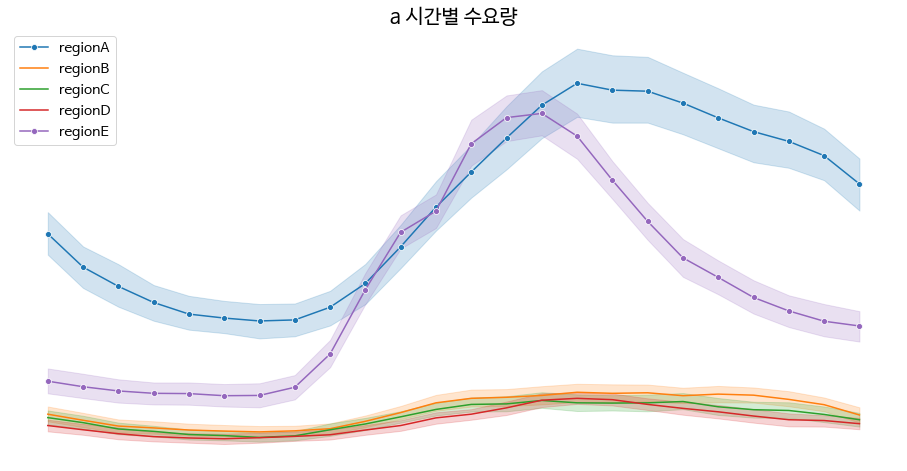

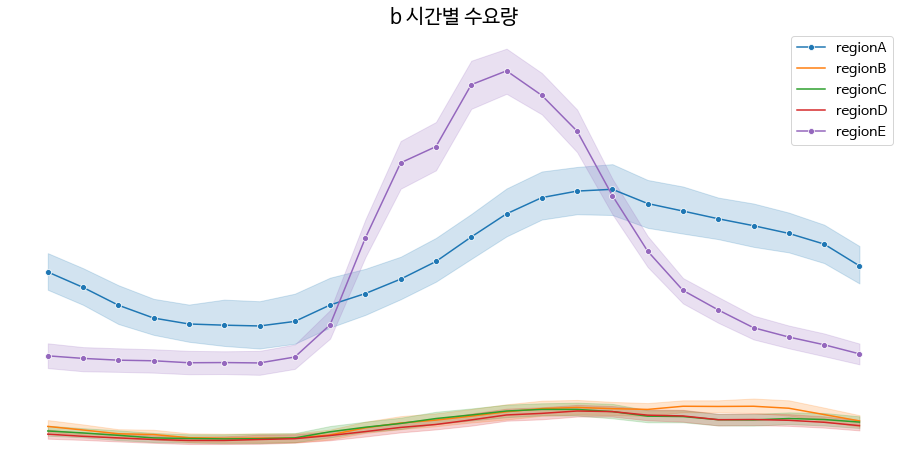

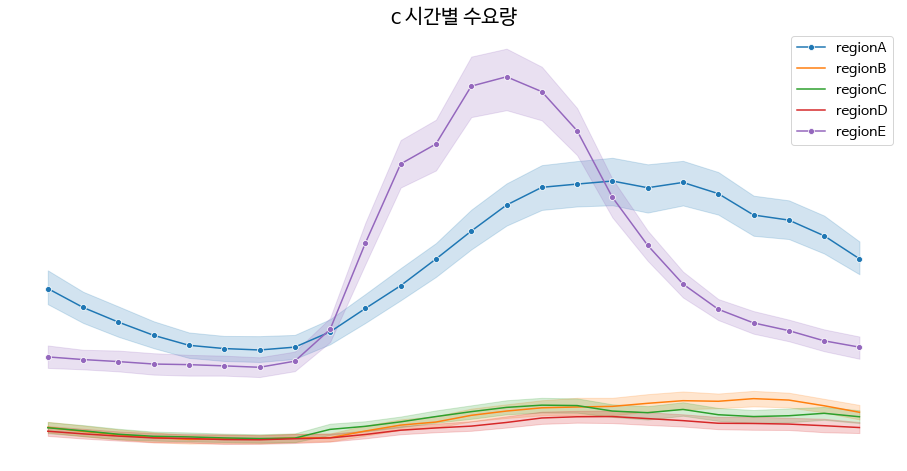

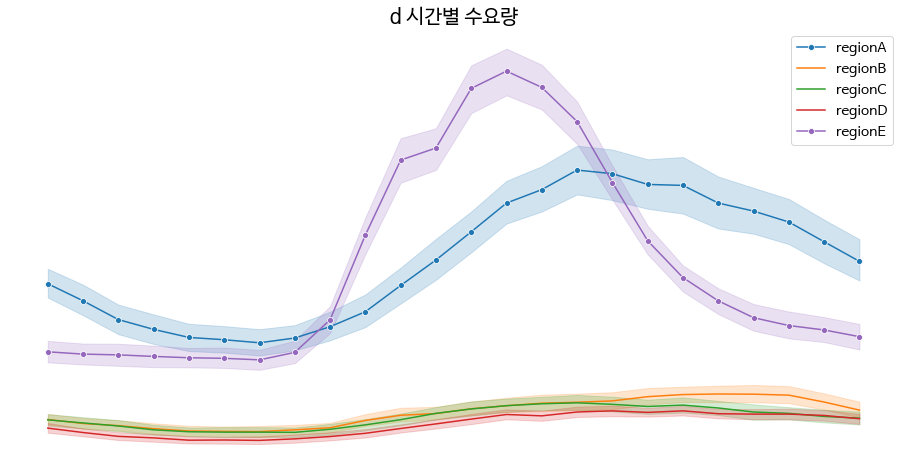

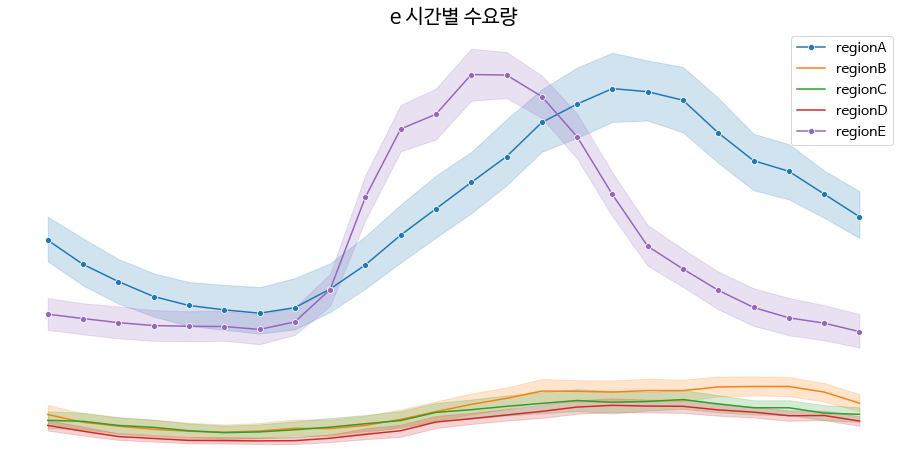

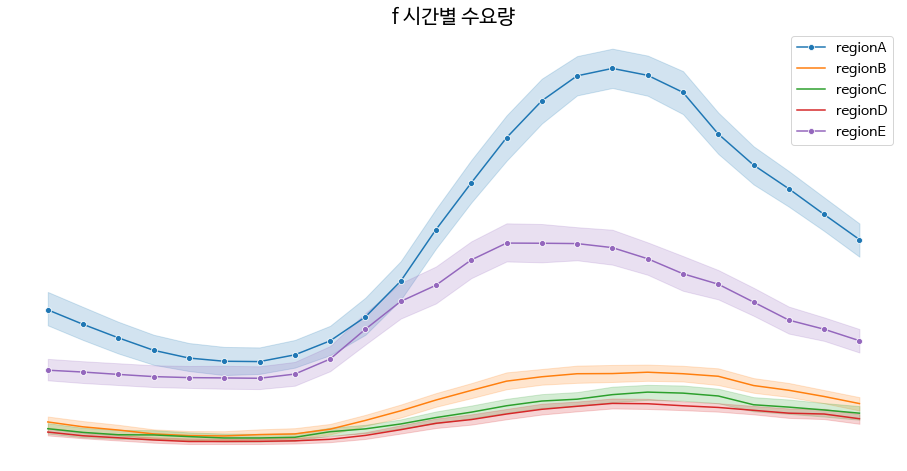

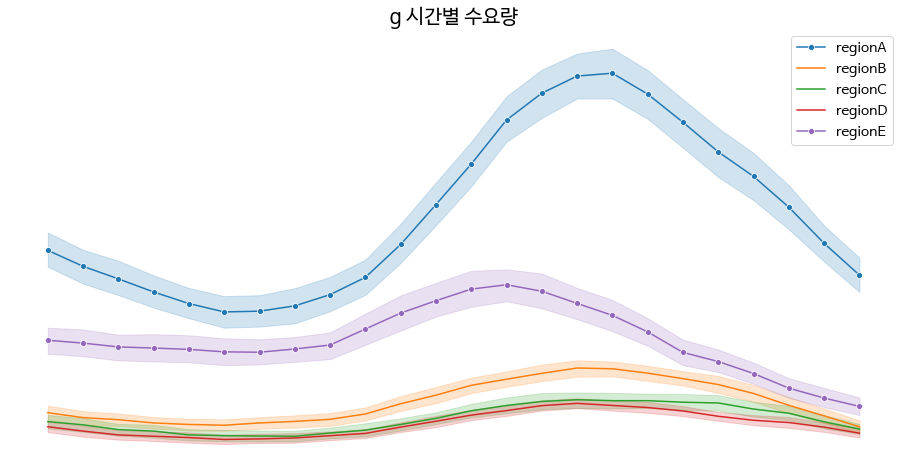

In [ ]:
for idx, name in enumerate(weekday_name):
    
    plt.figure(figsize=(16,8))
    plt.title(name + ' 시간별 수요량', fontsize=20)

    sns.lineplot(data=regionA_df[regionA_df['weekday'] == idx], x='hour', y='count', marker='o')
    sns.lineplot(data=regionB_df[regionB_df['weekday'] == idx], x='hour', y='count')
    sns.lineplot(data=regionC_df[regionC_df['weekday'] == idx], x='hour', y='count')
    sns.lineplot(data=regionD_df[regionD_df['weekday'] == idx], x='hour', y='count')
    sns.lineplot(data=regionE_df[regionE_df['weekday'] == idx], x='hour', y='count', marker='o')

    plt.xticks(range(0, 24, 3), range(0, 24, 3))
    plt.legend(['regionA', 'regionB', 'regionC', 'regionD', 'regionE'], fontsize=14)

    plt.axis('off')

- regionA는 A요일보다 G요일 수요가 높음
- 세부지역별로 수요는 요일과 시간에 따라 매우 다름
- regionA의 A요일 수요는 α시 경부터 증가하기 시작하고 Ω시가 가장 높음
- regionA의 G요일 수요는 A요일 수요에 비해 Ω시에 급격한 상승을 보임
- **regionA는 여가, 레저를 위한 쏘카 이용 비율이 비교적 높을 것으로 예상됨**
- regionE은 G요일보다 A요일 수요가 매우 높음
- regionE 수요는 요일별 비슷한 패턴을 가짐
  - F요일과 G요일은 다른 요일에 비해 다소 떨어지는 수요량을 가짐
  - regionE은 주요 업무 시간인 α시~Ω시 사이에서 고정적인 수요를 가진다고 보여짐
- **regionE은 업무를 위한 쏘카 이용이 매우 높을 것으로 예상됨**
- regionB, regionC, regionD는 비교적 쏘카 이용 횟수가 적어 그래프가 파악하기 어려움
  - regionB, regionC, regionD에 대한 그래프를 따로 그려볼 필요가 있음

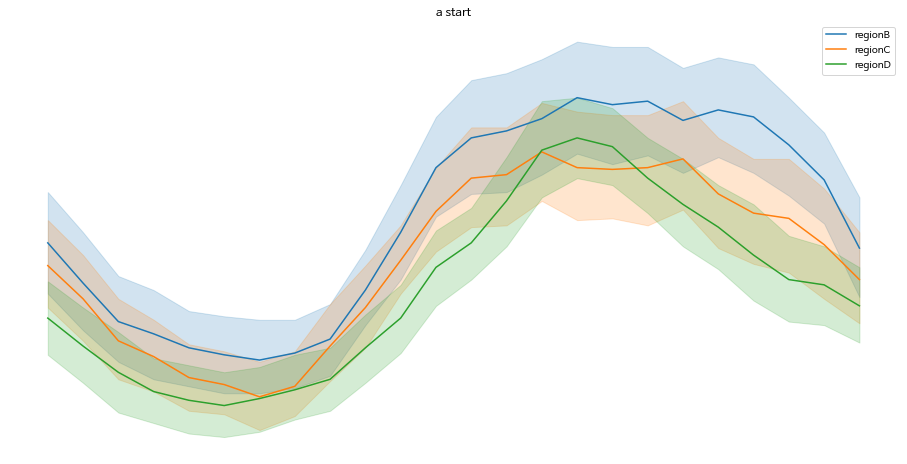

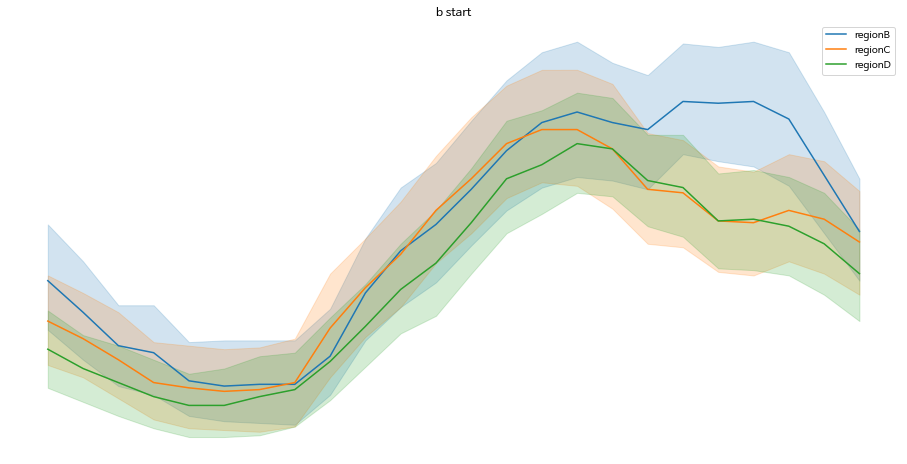

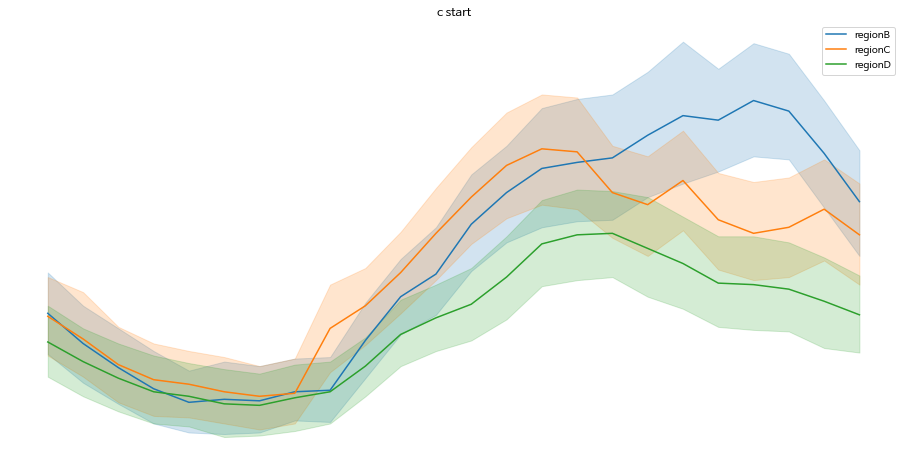

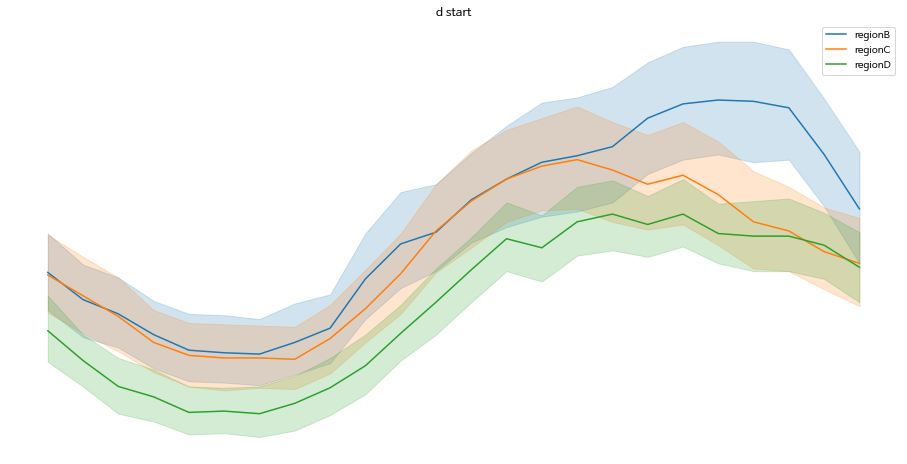

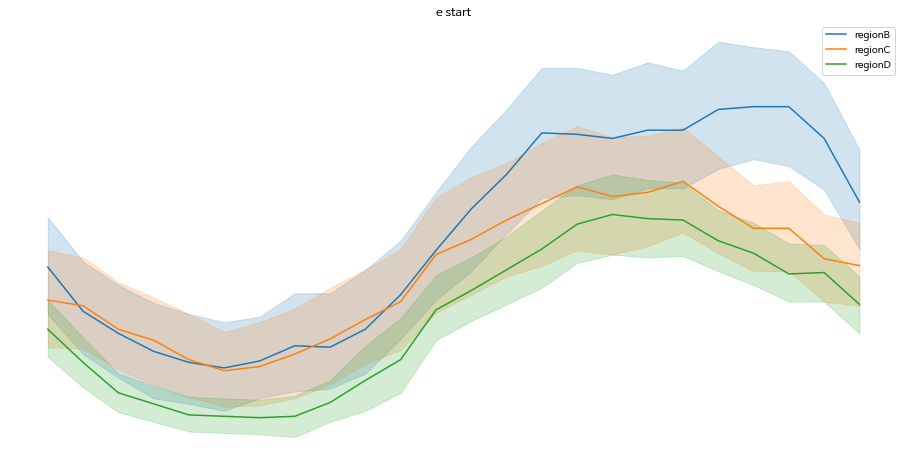

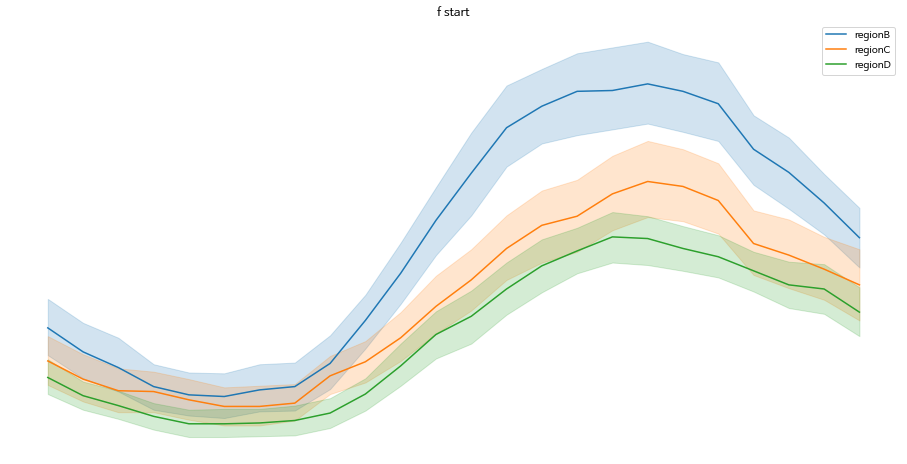

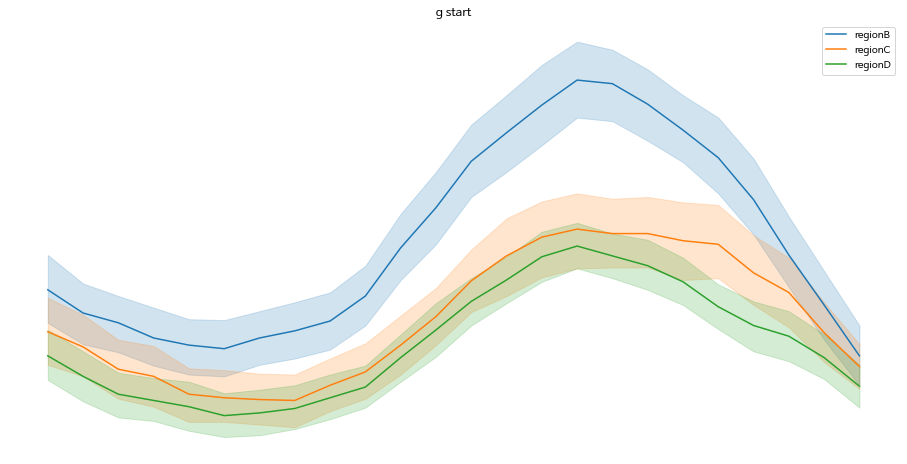

In [ ]:
for idx, name in enumerate(weekday_name):
    
    plt.figure(figsize=(16,8))
    plt.title(name + ' start')

    sns.lineplot(data=regionB_df[regionB_df['weekday'] == idx], x='hour', y='count')
    sns.lineplot(data=regionC_df[regionC_df['weekday'] == idx], x='hour', y='count')
    sns.lineplot(data=regionD_df[regionD_df['weekday'] == idx], x='hour', y='count')
    
    plt.legend(['regionB', 'regionC', 'regionD'])

    plt.axis('off')

- regionB는 regionC와 regionD에 비해 β시의 수요가 높음
- **regionB의 일과 시간 후 여가용으로 쏘카를 이용할 것으로 예상됨**
- regionB의 특정요일 regionC와 regionD에 비해 수요 증가폭이 커짐
- regionC는 이용율이 낮아 outlier의 영향력이 커졌을 것으로 예상됨
- regionD는 요일별 비슷한 수요패턴을 보임
